<a href="https://colab.research.google.com/github/koteshvarma2/MLT/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3891 - loss: 2.0709 - val_accuracy: 0.7450 - val_loss: 0.9624
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8031 - loss: 0.6642 - val_accuracy: 0.8500 - val_loss: 0.5333
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9012 - loss: 0.3394 - val_accuracy: 0.8700 - val_loss: 0.4498
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8766 - loss: 0.3217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


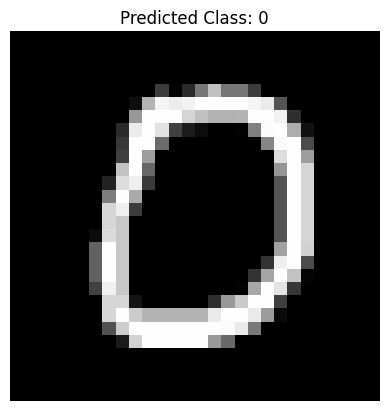

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train[:1000], y_train[:1000], epochs=3, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(x_test[:500], y_test[:500])

sample_index = 10
sample_image = x_test[sample_index]
prediction = model.predict(sample_image[np.newaxis, ...])
predicted_class = np.argmax(prediction)

import matplotlib.pyplot as plt
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
